In [2]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git
!pip install pandas
!pip install nltk
!pip install matplotlib
!pip install seaborn
!pip install googletrans==4.0.0-rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/JustAnotherArchivist/snscrape.git to /tmp/pip-req-build-q57i92x9
  Running command git clone --filter=blob:none --quiet https://github.com/JustAnotherArchivist/snscrape.git /tmp/pip-req-build-q57i92x9
  Resolved https://github.com/JustAnotherArchivist/snscrape.git to commit db4824e39715f7b352a224615adcb8eb1840f417
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for snscrape: filename=snscrape-0.6.2.20230321.dev51+gdb4824e-py3-none-any.whl size=74653 sha256=2cc96e6ce76652f3a7c0e94da566acf3c12e3ec2e60f6fb5918ae497e83480b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lldw351c/wheels/05/e9/f7/57056e7c7e44b1feed932fa49fdec9d706c4f563e37160ab74
Successfully built snscrape
Looking in indexes: https://pypi.org/simple, h

In [3]:
import os
import datetime
import pandas as pd
import ast
import json
import csv
import seaborn as sns
import nltk
import matplotlib.pyplot as plt
from textblob import TextBlob
from googletrans import Translator

In [4]:
# Batasi jumlah hasil yang diambil
hasil_maksimal = 1000

# Gunakan Twitter search untuk mencari tweet yang di-favoritkan minimal 10000 kali dan berbahasa Indonesia
twitter_search = "Ahmad Dhani DPR lang:id since:2023-03-01 until:2023-06-22"

# Tentukan nama file dengan format "<kueri pencarian>_<tanggal saat ini>.json"
filename = f"{twitter_search.replace(' ', '_').replace(':', '-').replace('#', '')}_{datetime.date.today().strftime('%Y-%m-%d')}.json"

USING_TOP_SEARCH = False

snscrape_params = '--jsonl --max-results'
twitter_search_params = ''

if USING_TOP_SEARCH:
    twitter_search_params += "--top"

snscrape_search_query = f"snscrape {snscrape_params} {hasil_maksimal} twitter-search {twitter_search_params} '{twitter_search}' > {filename}"

print(snscrape_search_query)

os.system(snscrape_search_query)

snscrape --jsonl --max-results 1000 twitter-search  'Ahmad Dhani DPR lang:id since:2023-03-01 until:2023-06-22' > Ahmad_Dhani_DPR_lang-id_since-2023-03-01_until-2023-06-22_2023-06-22.json


0

In [5]:
# Membaca file JSON hasil dari perintah CLI sebelumnya dan membuat dataframe pandas
tweets_df = pd.read_json(filename, lines=True)

NAMA_FILE_CSV = 'ahmad_dhani.csv'

# Membuat kamus untuk mengganti nama kolom
new_columns = {
    'conversationId': 'Conv. ID',
    'url': 'URL',
    'date': 'Date',
    'rawContent': 'Tweet',
    'id': 'ID',
    'replyCount': 'Replies',
    'retweetCount': 'Retweets',
    'likeCount': 'Likes',
    'quoteCount': 'Quotes',
    'bookmarkCount': 'Bookmarks',
    'lang': 'Language',
    'links': 'Links',
    'media': 'Media',
    'retweetedTweet': 'Retweeted Tweet',
    'username': 'Username'
}

if len(tweets_df) == 0:
    print('Pencarian tidak ditemukan coba ganti keyword lain, keywordmu: ', twitter_search)
    exit()
else:
  # Memilih kolom yang akan digunakan dan mengganti nama kolom menggunakan kamus yang telah dibuat
  tweets_df = tweets_df.loc[:, ['url', 'date', 'rawContent', 'id',
                            'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
                            'conversationId', 'lang', 'links',
                            'media', 'retweetedTweet', 'bookmarkCount', 'username']]
  tweets_df = tweets_df.rename(columns=new_columns)

  # Ekstrak fullUrl dari kolom media dan url dari kolom links
  tweets_df['Media'] = tweets_df['Media'].apply(lambda x: x[0]['fullUrl'] if isinstance(x, list) and x and isinstance(x[0], dict) and 'fullUrl' in x[0] else None)
  tweets_df['Links'] = tweets_df['Links'].apply(lambda x: x[0]['url'] if isinstance(x, list) and x and isinstance(x[0], dict) and 'url' in x[0] else None)

  # Menampilkan dataframe tweets_df
  display(tweets_df)

,URL,Date,Tweet,ID,Replies,Retweets,Likes,Quotes,Conv. ID,Language,Links,Media,Retweeted Tweet,Bookmarks,Username
0,https://twitter.com/myscofieldss/status/167103...,2023-06-20 05:50:03+00:00,anggota DPR dari Fraksi Partai Gerindra Aryo D...,1671032645554421760,0,0,0,0,1671032527144775680,in,None,None,NaN,0,myscofieldss
1,https://twitter.com/yowesbend950/status/167004...,2023-06-17 12:16:11+00:00,@_palungmariana @DivHumas_Polri @KejaksaanRI @...,1670042653076094978,3,2,22,0,1669971693555838976,in,None,None,NaN,1,yowesbend950
2,https://twitter.com/meitag1/status/16693353070...,2023-06-15 13:25:26+00:00,@ErickConstant14 @dennyindrayana Asiiik ntar D...,1669335307014279170,0,0,1,0,1669285711596630016,in,None,None,NaN,0,meitag1
3,https://twitter.com/meitag1/status/16693350440...,2023-06-15 13:24:23+00:00,@yuniepertiwi @dennyindrayana Asiiik ntar DPR ...,1669335044035575808,0,0,0,0,1669285711596630016,in,None,None,NaN,0,meitag1
4,https://twitter.com/myscofieldss/status/166922...,2023-06-15 06:25:10+00:00,anggota DPR dari Fraksi Partai Gerindra Aryo D...,1669229541913677824,1,0,0,0,1669229334882811904,in,None,None,NaN,0,myscofieldss
5,https://twitter.com/Tanto19/status/16628333161...,2023-05-28 14:48:51+00:00,@disanness @Godam062 @PartaiSocmed Ngaco ah. S...,1662833316154990594,0,0,0,0,1662746941888028676,in,None,None,NaN,0,Tanto19
6,https://twitter.com/ardbramantyo/status/165827...,2023-05-16 00:39:15+00:00,"Kalau Once sama Ahmad Dhani kepilih, DPR bakal...",1658270854139248640,0,0,0,0,1658270854139248640,in,None,None,NaN,0,ardbramantyo
7,https://twitter.com/7234nG16/status/1658216283...,2023-05-15 21:02:24+00:00,@MataNajwa Mereka2 dicalonkan karna sudah dike...,1658216283413028865,0,0,2,0,1658122303849234438,in,None,None,NaN,0,7234nG16
8,https://twitter.com/BloombergTZ/status/1657604...,2023-05-14 04:30:33+00:00,"Incar DPR, Ahmad Dhani hingga Taufik Hidayat J...",1657604289123209216,0,0,0,0,1657604289123209216,in,http://dlvr.it/Sp0n5c,None,NaN,0,BloombergTZ
9,https://twitter.com/radaraktual/status/1657459...,2023-05-13 18:56:26+00:00,"Melly Goeslaw, Ahmad Dhani Hingga Ari Sihasale...",1657459807819792394,0,0,0,0,1657459807819792394,in,https://radaraktual.com/141039/melly-goeslaw-a...,None,NaN,0,radaraktual


In [6]:
# Cek jumlah data yang didapatkan

num_tweets = len(tweets_df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 32.


In [19]:
  # Simpan ke csv
  tweets_df.to_csv(NAMA_FILE_CSV, index=False)

In [9]:
#Ekstrak kolom tweet untuk dilakukan sentimen analisis
nama_kolom = 'Tweet'
kalimat = tweets_df[nama_kolom].tolist()

In [16]:
from googletrans import Translator
from textblob import TextBlob

translator = Translator()
isi_sentimen = []  #Menyimpan hasil sentimen

positive_count = 0
negative_count = 0
neutral_count = 0

for i in kalimat:
    translasi_kalimat = translator.translate(i, src='id', dest='en').text #Ditranslate dari indonesia ke inggris
    blob = TextBlob(translasi_kalimat)
    sentimen = blob.sentiment.polarity
    isi_sentimen.append(sentimen) #Dimasukkan ke dalam isi_sentimen

    if sentimen > 0:
        positive_count += 1
    elif sentimen < 0:
        negative_count += 1
    else:
        neutral_count += 1


print("Total sentimen positif : "+str(positive_count))
print("Total sentimen negatif : "+str(negative_count))
print("Total sentimen netral  : "+str(neutral_count))

Total sentimen positif : 15
Total sentimen negatif : 5
Total sentimen netral  : 12


Text(0, 0.5, 'Hitungan')

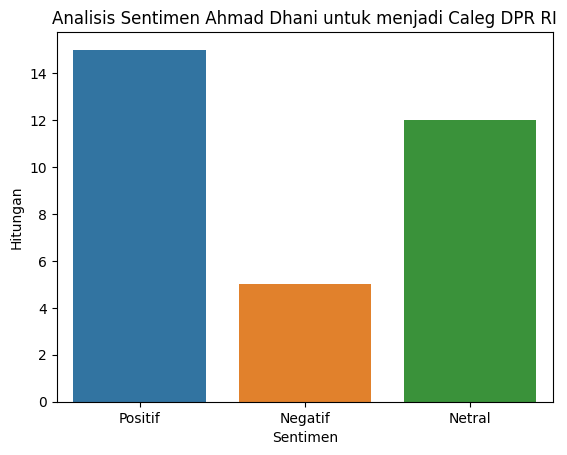

In [23]:
#Membuat bar plot menggunakan seaborn
label_sentimen = ["Positif", "Negatif", "Netral"]
total_sentimen = [positive_count, negative_count, neutral_count]

sns.barplot(x=label_sentimen, y=total_sentimen)
plt.title("Analisis Sentimen Ahmad Dhani untuk menjadi Caleg DPR RI")
plt.xlabel("Sentimen")
plt.ylabel("Hitungan")